In [152]:
%reload_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_visualizacion as sv
from src import soporte_featurescaling as sf

# SKlearn
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Se utiliza para el iterative
# -----------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

# Exploración del df de empleados

In [153]:
df_employee = pd.read_csv("../../datos/raw/employee_survey_data.csv")
df_employee

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [154]:
visualizador_empleados = sv.Visualizador(df_employee)
# visualizador_empleados.exploracion_datos()

In [155]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


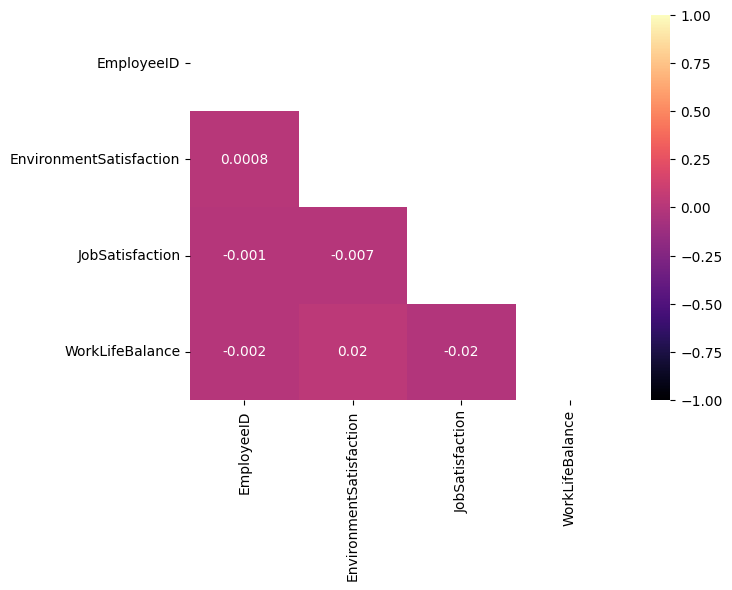

In [156]:
visualizador_empleados.correlacion()

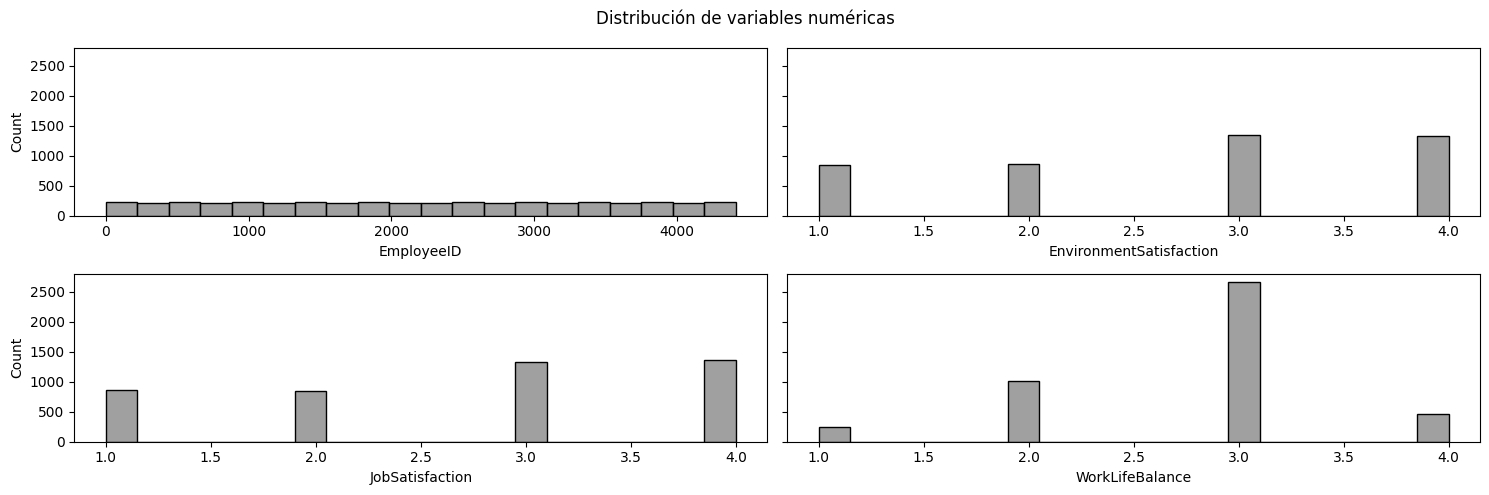

In [157]:
visualizador_empleados.plot_numericas()

- Primeras conclusiones:
    - No hay duplicados pero si hay un pequeño porcentaje de nulos. Veremos posteriormente que hacer con ellos.
    - La distribución de las variables númericas (solo hay numericas) parece indicar que tendríamos 3 columnas que son categoricas. Posteriormente gestionaremos estas columnas.

In [158]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(), max_iter=10, random_state=42)
it_imputados = imputer.fit_transform(X=df_employee.drop(columns=["EmployeeID"]))
df_num_sin_nulos = pd.DataFrame(it_imputados, columns=df_employee.drop(columns=["EmployeeID"]).columns)
df_employee[df_employee.drop(columns=["EmployeeID"]).columns] = df_num_sin_nulos

In [159]:
columnas_category = df_employee.drop(columns=["EmployeeID"]).columns
df_employee[columnas_category] = df_employee[columnas_category].astype("category")

In [160]:
df_employee.drop(columns=["EmployeeID"], inplace=True)

# Exploración del df de los datos generales

In [161]:
df_general = pd.read_csv("../../datos/raw/general_data.csv")
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [162]:
visualizador_general = sv.Visualizador(df_general)
visualizador_general.exploracion_datos()

El número de filas es 4410 y el número de columnas es 24

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


NumCompaniesWorked    0.430839
TotalWorkingYears     0.204082
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome 

None

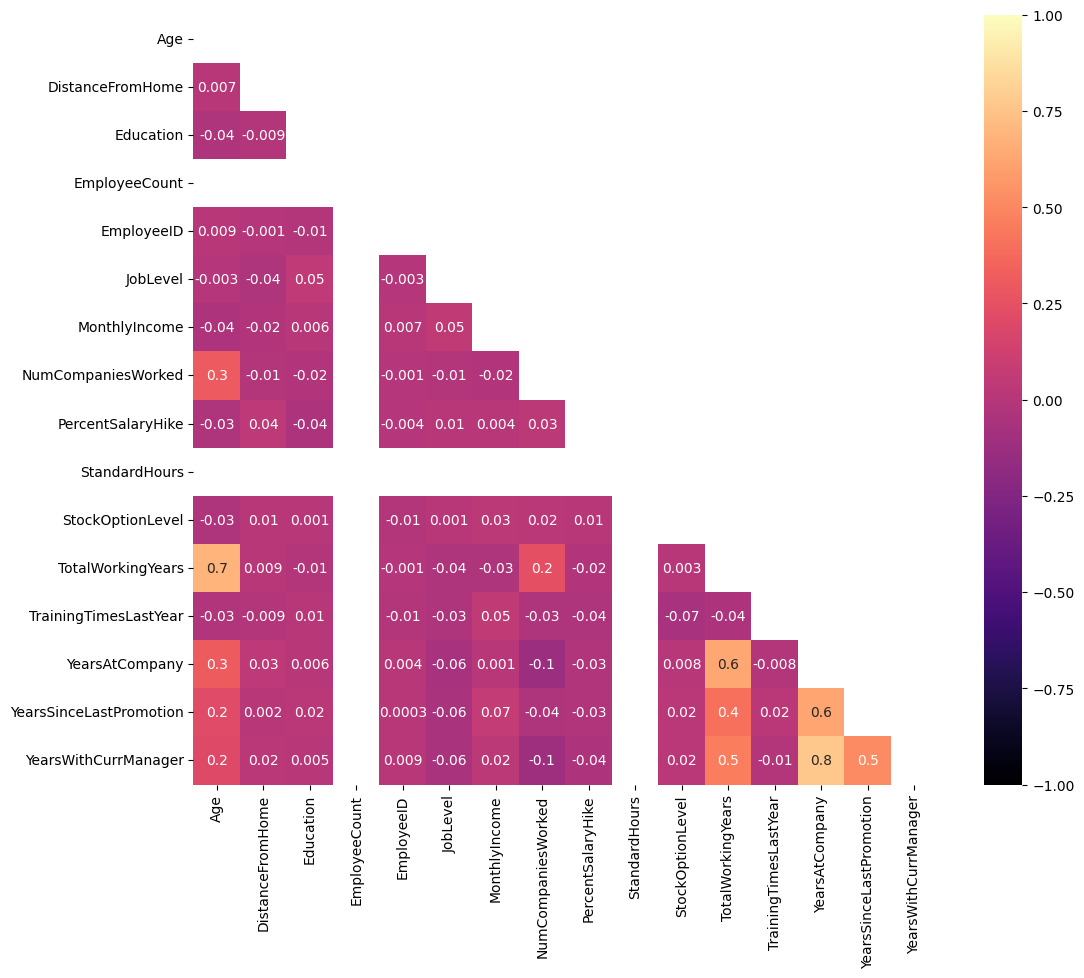

In [163]:
visualizador_general.correlacion((12,10))

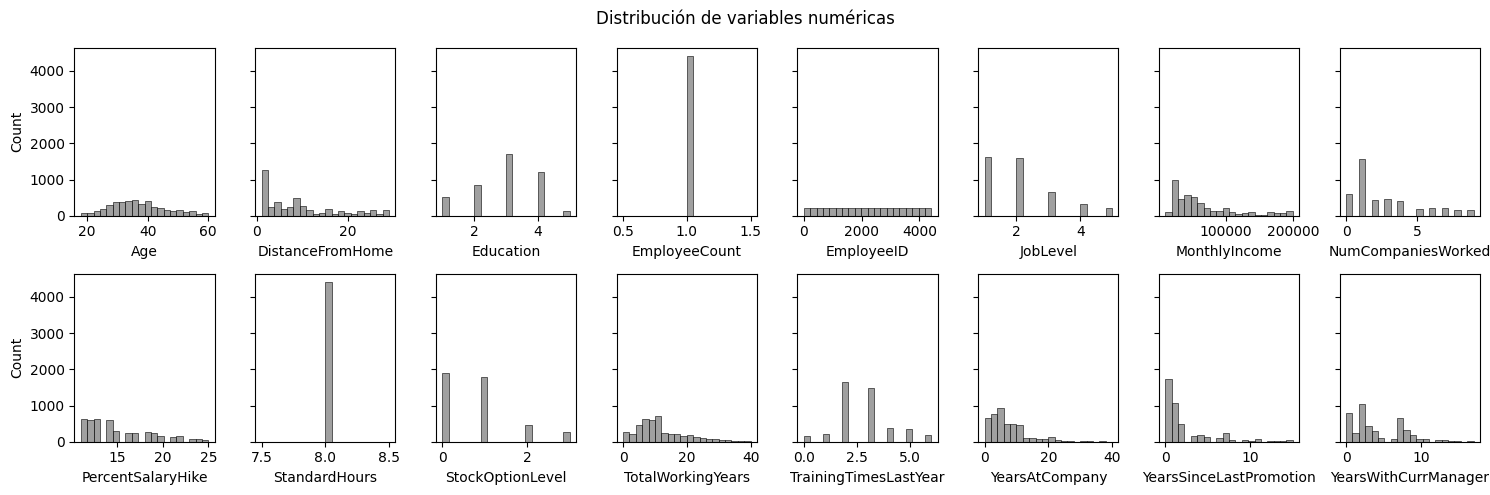

In [164]:
visualizador_general.plot_numericas()

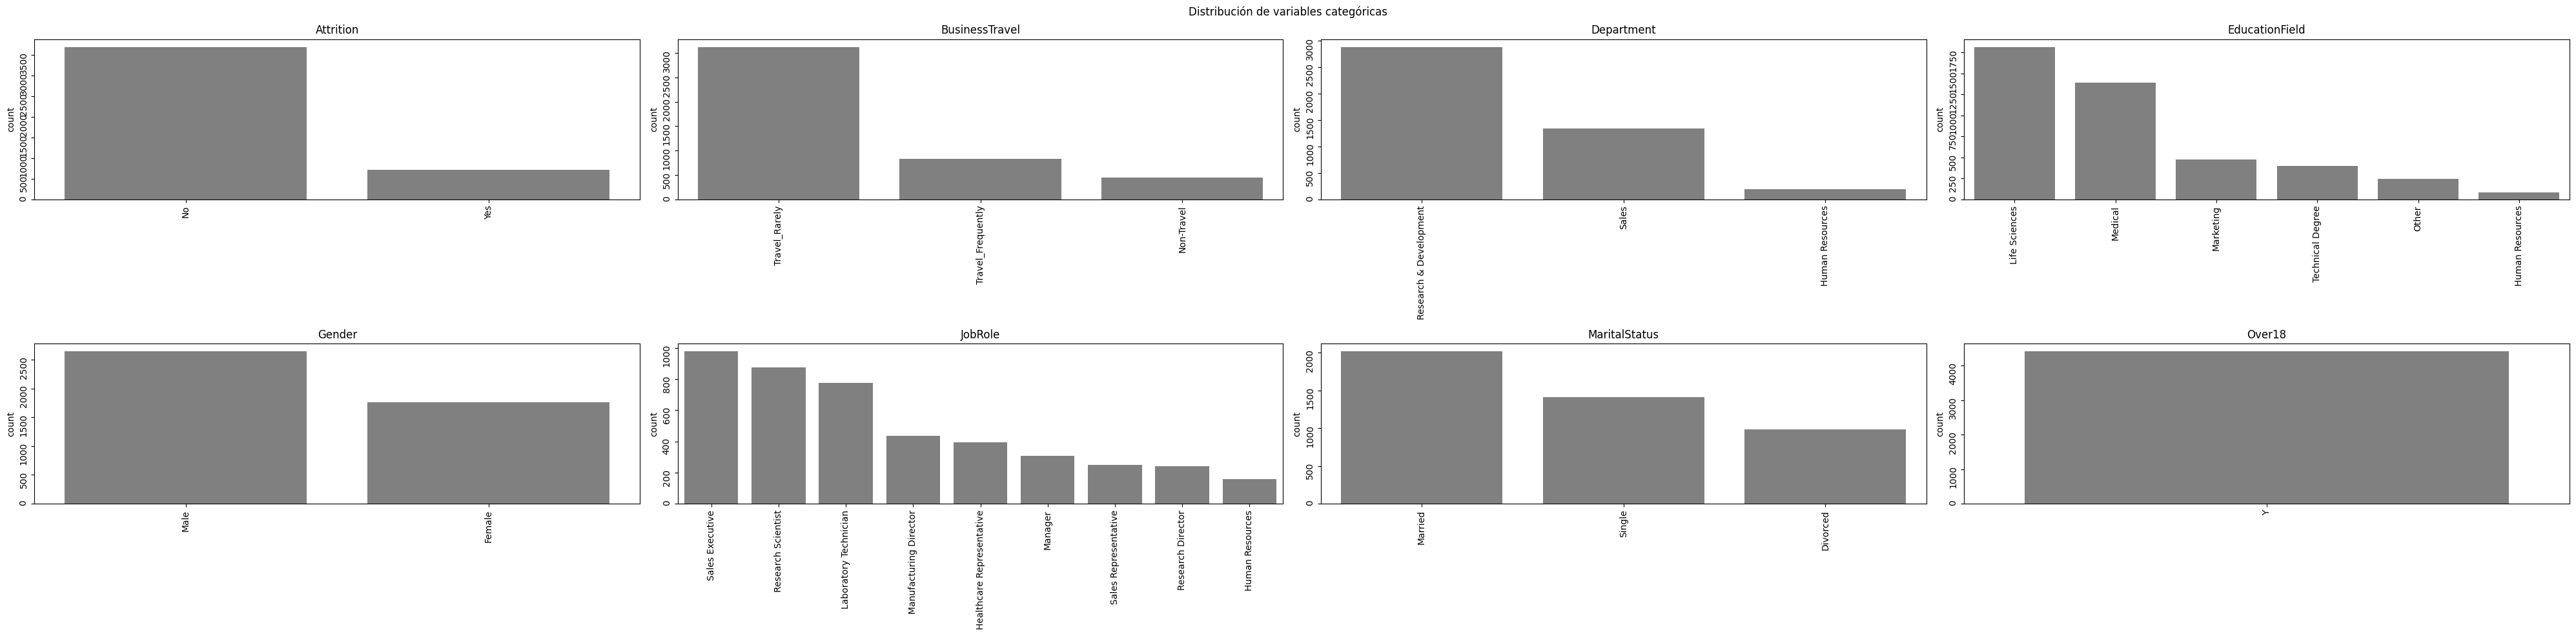

In [165]:
visualizador_general.plot_categoricas()

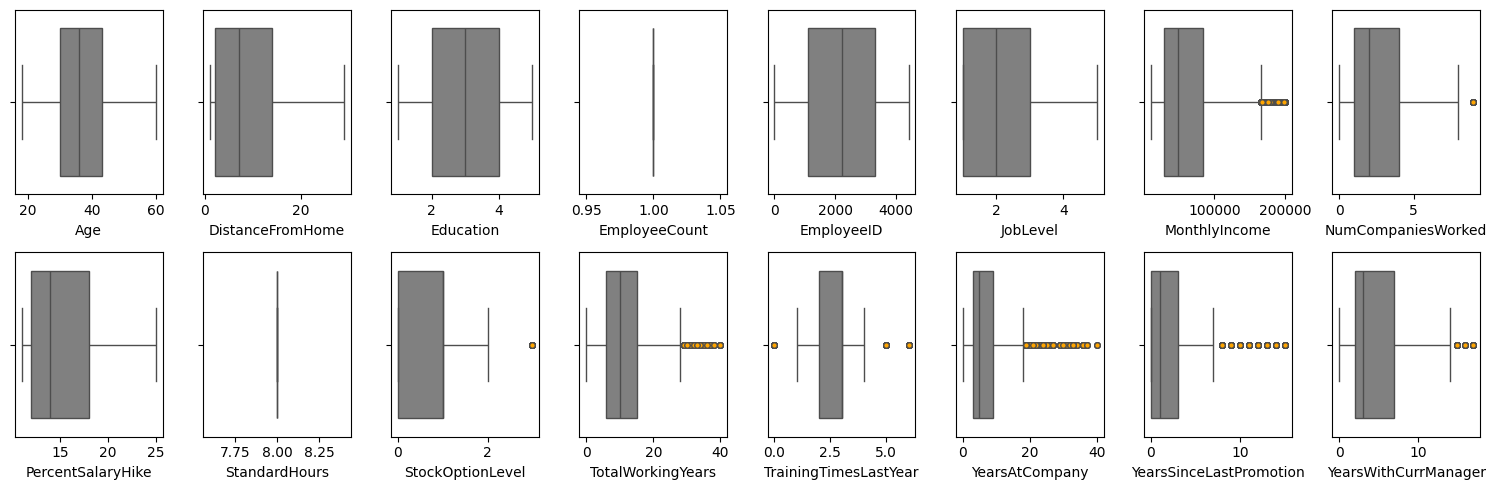

In [166]:
visualizador_general.deteccion_outliers()

- Primeras conclusiones:
    - Existen nulos pero no duplicados
    - Creo que nos podriamos quitar la columna EmployeeCount y StandardHours.
    - En cuanto a la visualización de outliers parece que tenemos varios outliers en distintas columnas. Profundizaremos más cuando llegemos a la gestión de outliers.

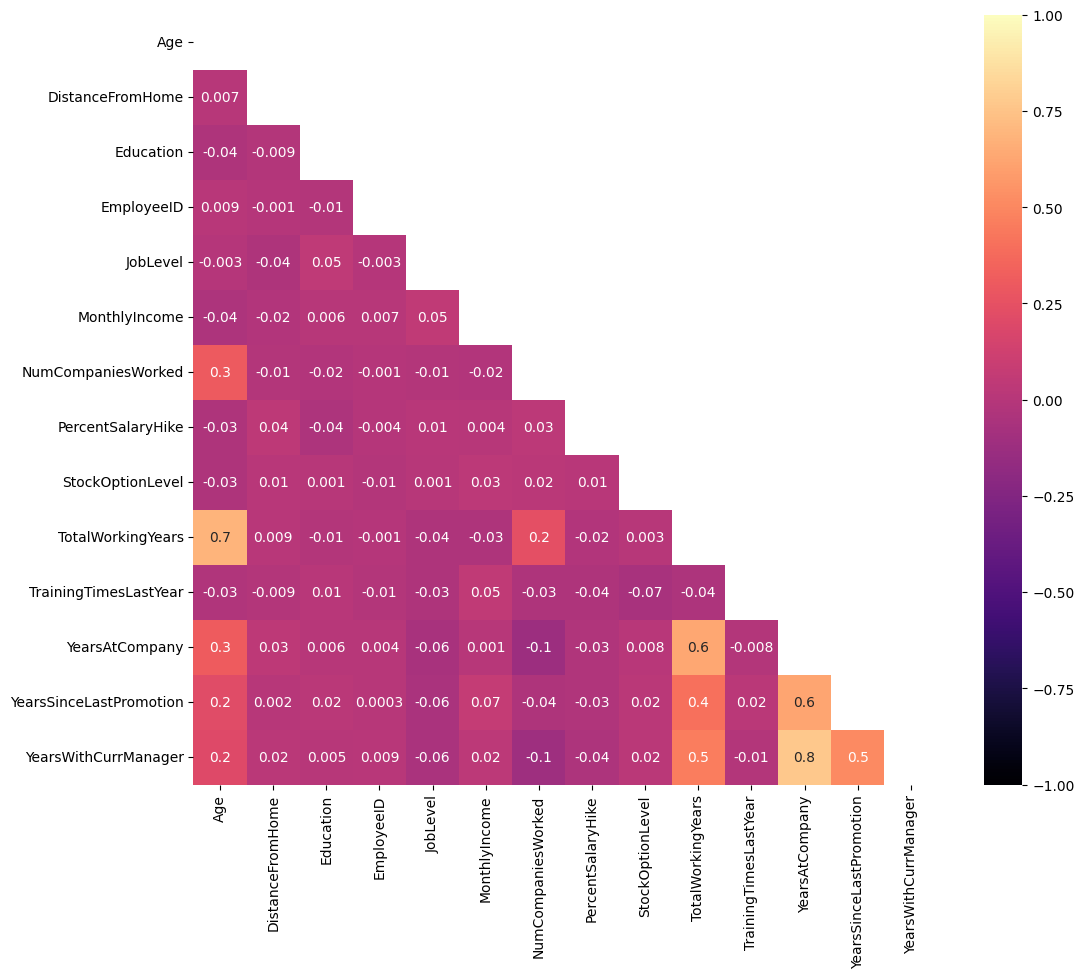

In [167]:
df_visualizacion = df_general.drop(columns=["EmployeeCount", "StandardHours"])
visualizador_prueba = sv.Visualizador(df_visualizacion)
visualizador_prueba.correlacion((12,10))

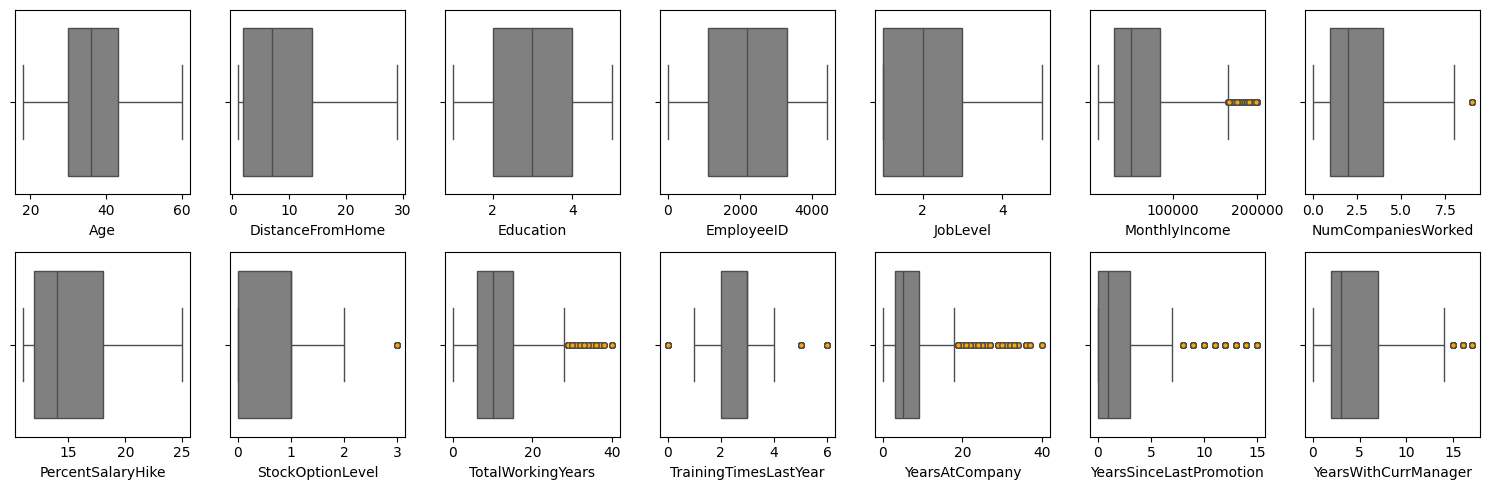

In [168]:
visualizador_prueba.deteccion_outliers()

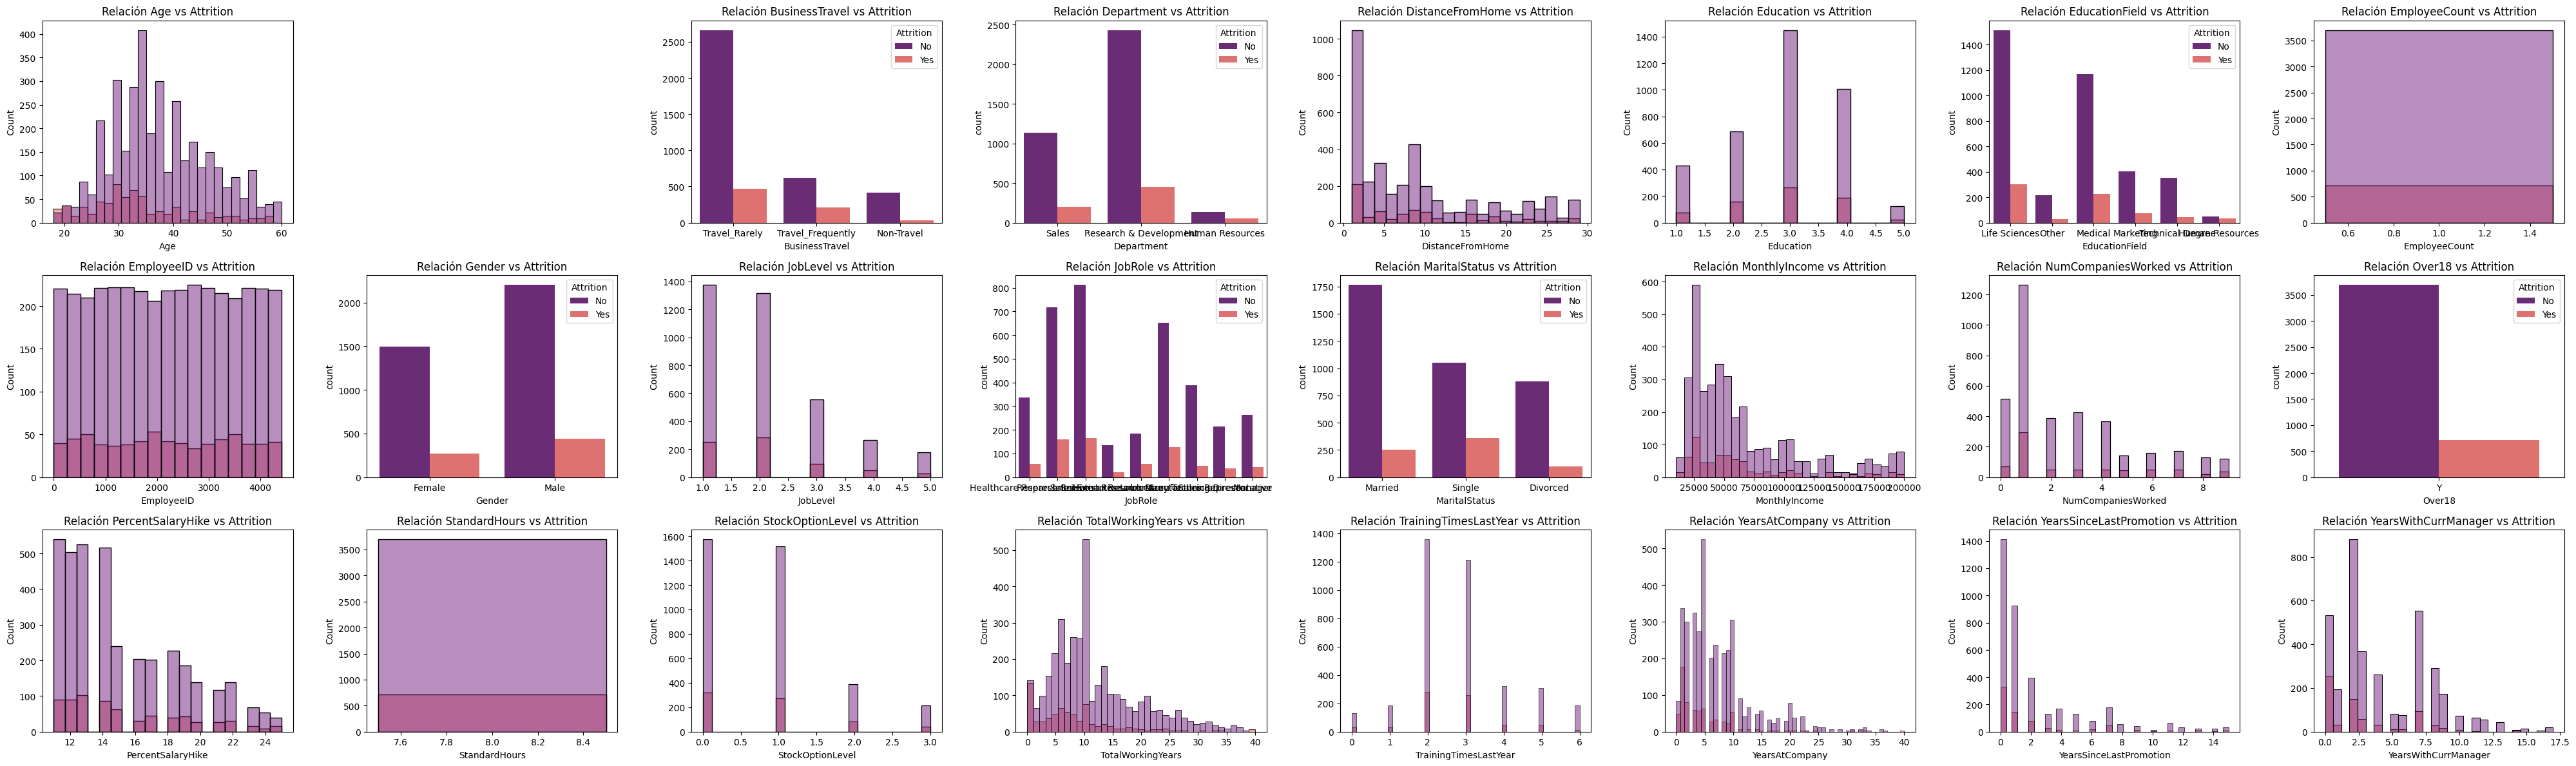

In [169]:
visualizador_general.plot_relacion("Attrition")

Categorizar: Education, JobLevel, StockOptionLevel

In [170]:
columnas_category = ["Education", "JobLevel", "StockOptionLevel"]
df_general[columnas_category] = df_general[columnas_category].astype("category")

df_general["StockOptionLevel"].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False, categories_dtype=int64)

In [171]:
df_general.drop(columns=["EmployeeID", "StandardHours", "Over18"], inplace=True)

# Exploración del df de los datos de managers

In [172]:
df_manager = pd.read_csv("../../datos/raw/manager_survey_data.csv")
df_manager

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [173]:
visualizador_managers= sv.Visualizador(df_manager)
# visualizador_managers.exploracion_datos()

In [174]:
df_manager.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

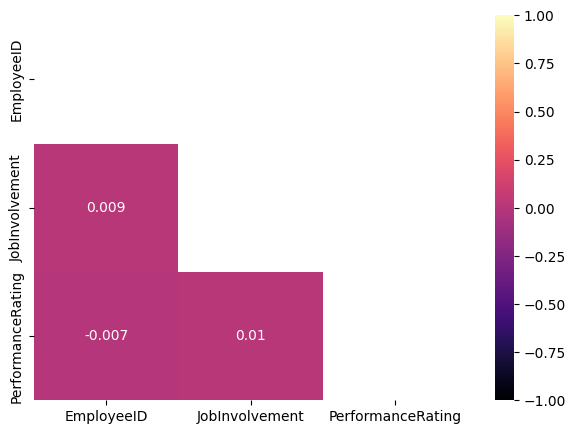

In [175]:
visualizador_managers.correlacion()

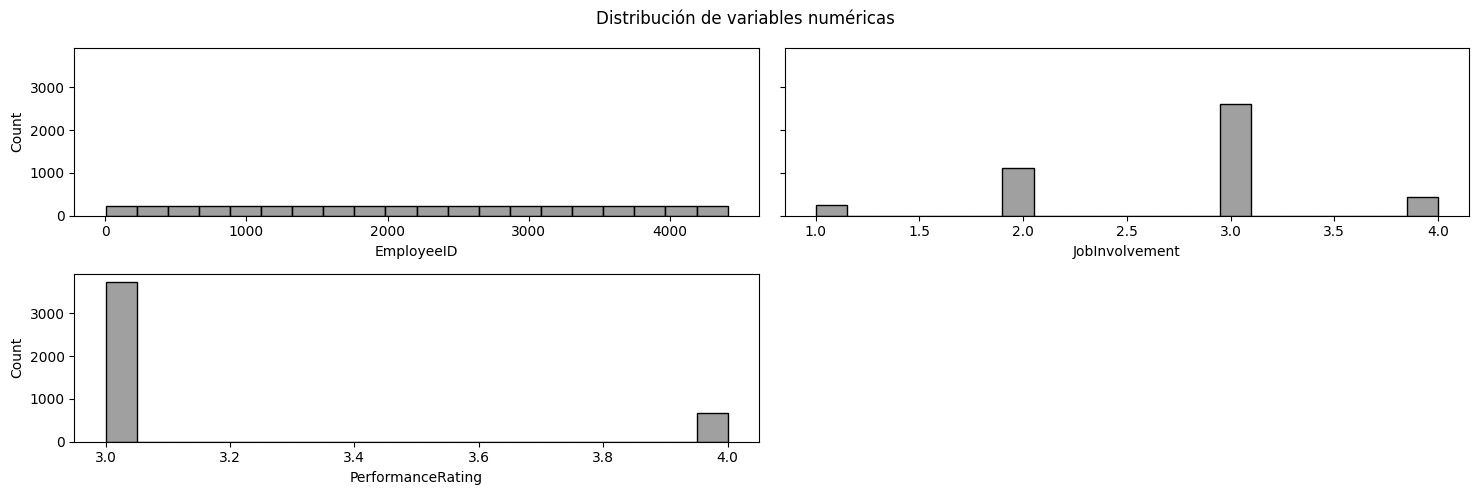

In [176]:
visualizador_managers.plot_numericas()

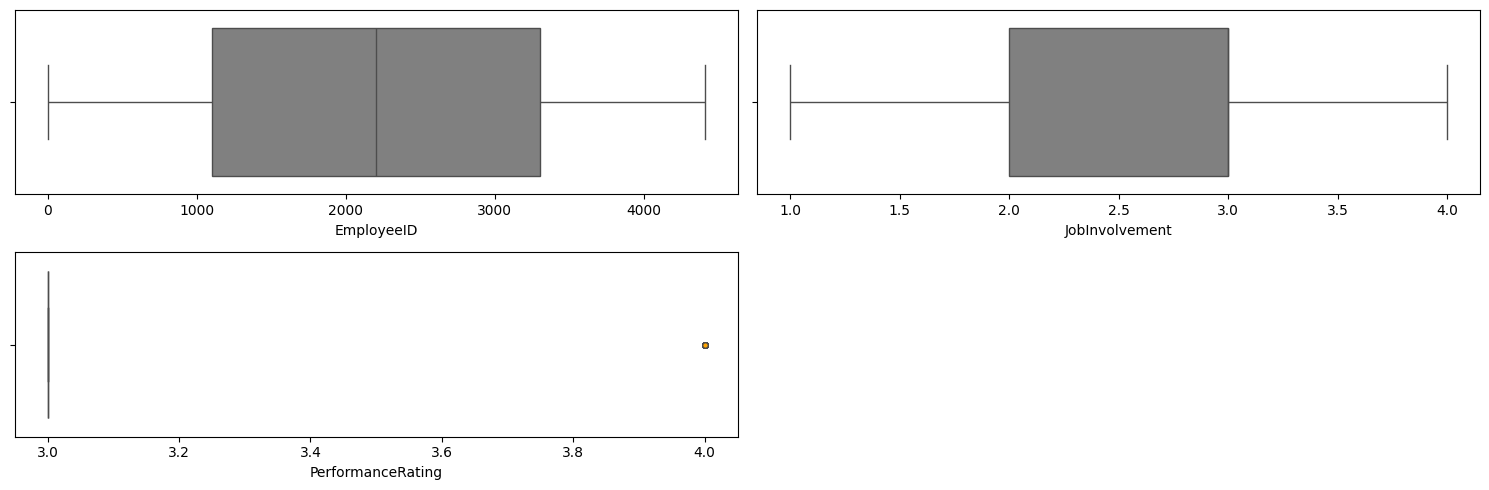

In [177]:
visualizador_managers.deteccion_outliers()

- Primeras conclusiones:
    - No existen nulos ni duplicados.
    - Todas las columnas son numericas. En concreto hay 2 de ellas que son categoricas.
    - En la detección de outliers no creo que sea outlier realmente tendremos que profundizar para saber la razón de por que lo detecta como outliers.

In [178]:
columnas_category = df_manager.drop(columns=["EmployeeID"]).columns
df_manager[columnas_category] = df_manager[columnas_category].astype("category")

df_manager["JobInvolvement"].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [179]:
df_manager.drop(columns=["EmployeeID"], inplace=True)

# Gestión df_final

In [180]:
df_final = pd.concat([df_general, df_employee, df_manager], axis=1)
df_final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


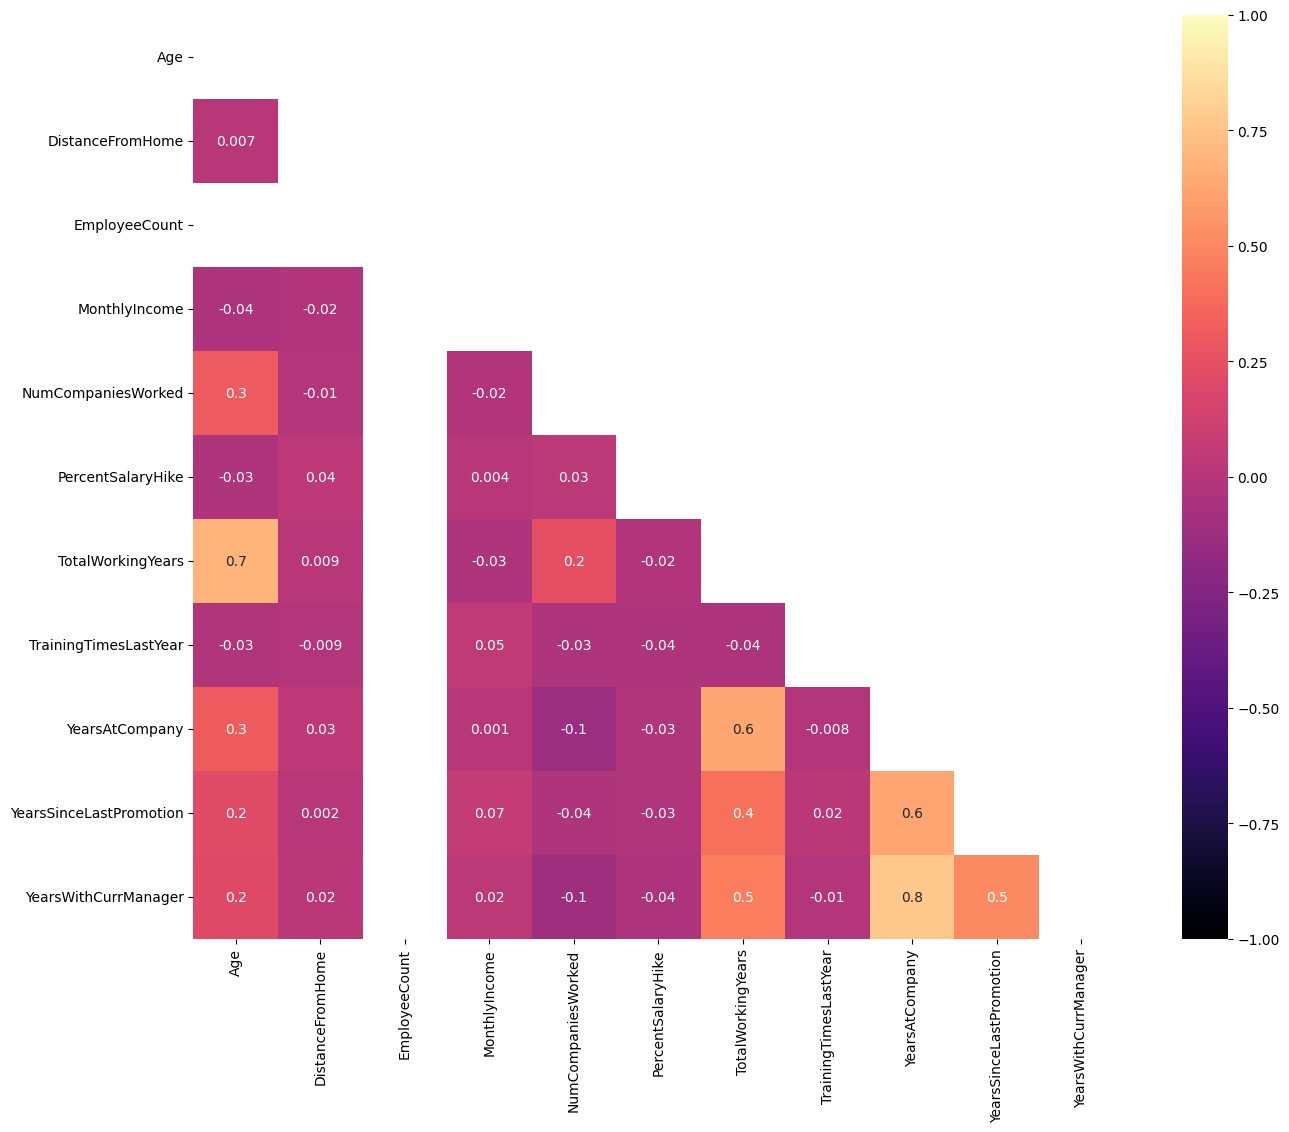

In [181]:
visualizador = sv.Visualizador(df_final)
visualizador.correlacion((15,12))

In [182]:
df_final.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [183]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(), max_iter=10, random_state=42)
columnas_nulos = [col for col in df_final.columns if df_final[col].isnull().any()]
print(columnas_nulos)
it_imputados = imputer.fit_transform(X=df_final[columnas_nulos])
df_num_sin_nulos = pd.DataFrame(it_imputados, columns=columnas_nulos)
df_final[columnas_nulos] = df_num_sin_nulos
df_final.isna().sum()

['NumCompaniesWorked', 'TotalWorkingYears']


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [184]:
df_final.select_dtypes("category")

,Education,JobLevel,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,2,1,0,3.0,4.0,2.0,3,3
1,1,1,1,3.0,2.0,4.0,2,4
2,4,4,3,2.0,2.0,1.0,3,3
3,5,3,3,4.0,4.0,3.0,2,3
4,1,1,2,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...
4405,4,1,1,4.0,1.0,3.0,3,3
4406,4,1,0,4.0,4.0,3.0,2,3
4407,2,2,0,1.0,3.0,3.0,3,4
4408,2,1,1,4.0,1.0,3.0,2,3


In [185]:
df_final.drop(columns="EmployeeCount", inplace=True)

In [186]:
df_final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [187]:
df_final.to_pickle("datos/data_final.pkl")